In [ ]:
#general libraries 
import numpy as np 
import pandas as pd 
import os
import random
from sklearn.utils import shuffle
import shutil

#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.patches as patches

# work with images
from skimage.transform import rotate
from skimage import io
import cv2 as cv

# model development
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import RandomFlip, RandomZoom, RandomRotation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!wget http://www.inf.ufpr.br/vri/databases/BreaKHis_v1.tar.gz

--2022-11-10 00:22:13--  http://www.inf.ufpr.br/vri/databases/BreaKHis_v1.tar.gz
Resolving www.inf.ufpr.br (www.inf.ufpr.br)... 200.17.202.113, 2801:82:80ff:8001:216:ccff:feaa:79
Connecting to www.inf.ufpr.br (www.inf.ufpr.br)|200.17.202.113|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.inf.ufpr.br/vri/databases/BreaKHis_v1.tar.gz [following]
--2022-11-10 00:22:14--  https://www.inf.ufpr.br/vri/databases/BreaKHis_v1.tar.gz
Connecting to www.inf.ufpr.br (www.inf.ufpr.br)|200.17.202.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4273561758 (4.0G) [application/octet-stream]
Saving to: ‘BreaKHis_v1.tar.gz’

BreaKHis_v1.tar.gz  100%[===================>]   3.98G  16.3MB/s    in 4m 14s  

2022-11-10 00:26:29 (16.0 MB/s) - ‘BreaKHis_v1.tar.gz’ saved [4273561758/4273561758]



In [ ]:
import os
from fnmatch import fnmatch

malignant_list = []

root = '/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/malignant'
pattern1 = '*.png'

for path, subdirs, files in os.walk(root):
    for name in files:
        if (fnmatch(name, pattern1) and name.find('-400-') != -1):
            #print(os.path.join(path, name))
            malignant_list.append(os.path.join(path, name))

/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-015.png
/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-004.png
/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-008.png
/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-002.png
/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-001.png
/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-007.png
/content/drive/MyDrive/Masters_stuff/Bre

In [ ]:
malignant_list

['/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-015.png',
 '/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-004.png',
 '/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-008.png',
 '/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-002.png',
 '/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-001.png',
 '/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/malignant/SOB/papillary_carcinoma/SOB_M_PC_15-190EF/400X/SOB_M_PC-15-190EF-400-007.png',
 '/content/drive

In [ ]:
import os
from fnmatch import fnmatch

benign_list = []

root = '/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/benign'
pattern1 = '*.png'

for path, subdirs, files in os.walk(root):
    for name in files:
        if (fnmatch(name, pattern1) and name.find('-400-') != -1):
            #print(os.path.join(path, name))
            benign_list.append(os.path.join(path, name))

benign_list

['/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/400X/SOB_B_F-14-9133-400-001.png',
 '/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/400X/SOB_B_F-14-9133-400-002.png',
 '/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/400X/SOB_B_F-14-9133-400-006.png',
 '/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/400X/SOB_B_F-14-9133-400-005.png',
 '/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/400X/SOB_B_F-14-9133-400-003.png',
 '/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-9133/400X/SOB_B_F-14-9133-400-004.png',
 '/content/drive/MyDrive/Masters_stuff/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/S

In [ ]:
complete_list = benign_list + malignant_list
random.shuffle(complete_list)


In [ ]:
# 0 for benign, 1 for malignant

complete_list_labels = [0 if 'benign' in x else 1 for x in complete_list]

In [ ]:
dataset = {
    'id':complete_list,
    'label':complete_list_labels
}


In [ ]:
df = pd.DataFrame.from_dict(dataset)
df.head()

id  label
0  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
1  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      0
2  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
3  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
4  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.2)

In [ ]:
train_data.reset_index(inplace = True)
test_data.reset_index(inplace = True)
train_data.head()

index                                                 id  label
0   1152  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
1   1825  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
2   1937  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
3    635  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
4    489  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1

In [ ]:
train_data.describe()

index        label
count  2177.000000  2177.000000
mean   1345.611392     0.909049
std     785.970209     0.287605
min       0.000000     0.000000
25%     668.000000     1.000000
50%    1333.000000     1.000000
75%    2025.000000     1.000000
max    2721.000000     1.000000

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177 entries, 0 to 2176
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   2177 non-null   int64 
 1   id      2177 non-null   object
 2   label   2177 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 51.1+ KB


   Label Counts
1          1979
0           198


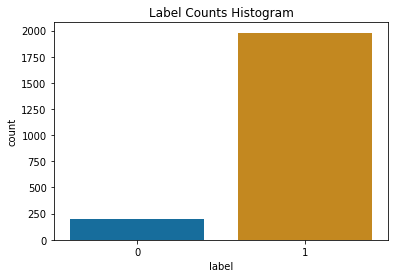

In [ ]:
#create histogram
print(pd.DataFrame(data={'Label Counts': train_data['label'].value_counts()}))
sns.countplot(x=train_data['label'], palette='colorblind').set(title='Label Counts Histogram');

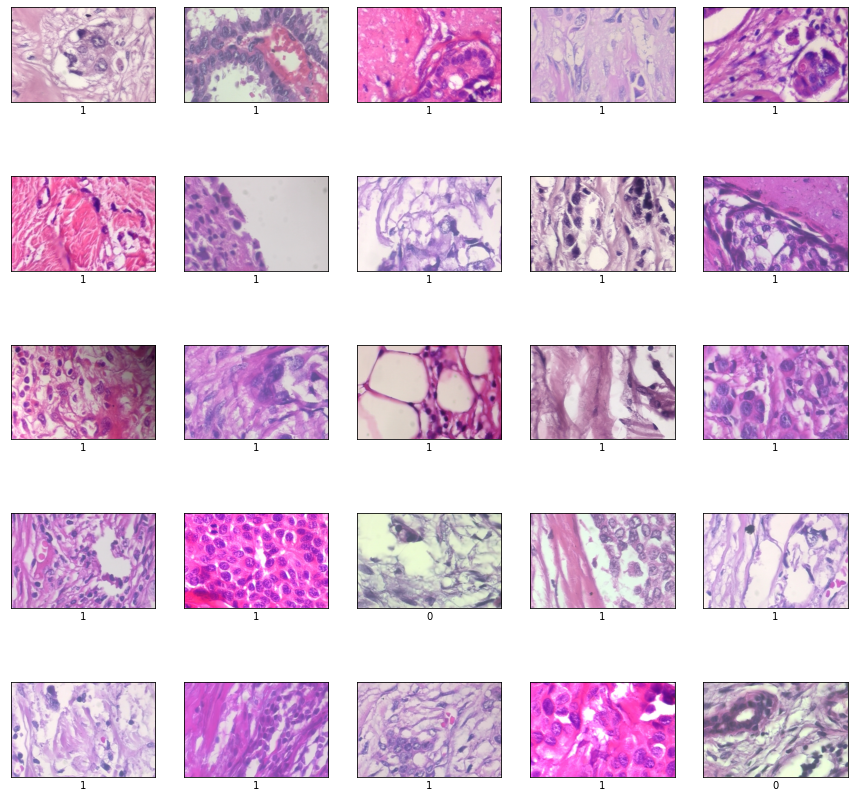

In [ ]:
#visualize a few images
fig, ax = plt.subplots(5, 5, figsize=(15, 15))
for i, axis in enumerate(ax.flat):
    file = str(train_data.id[i])
    image = io.imread(file)
    axis.imshow(image)
    
    axis.set(xticks=[], yticks=[], xlabel = train_data.label[i]);
  

**Model Architecture**

 two convolutional layers then a MaxPool layer (repeat this 2 times)

 input --> Conv2D --> Conv2D --> MaxPool --> Conv2D --> Conv2D --> MaxPool --> Flatten --> Output with sigmoid activation.

----------------------------------------------------
 First model:

Normalize images pre-training (image/255)

Output layer activation (sigmoid)

------------------------------------------

Second model contains all the first model parameters, but we also add:

Dropout (0.1)

Batch Normalization

Optimization (Adam)

Learning rate (0.0001)

Hidden layer activations (ReLU)

------------------------------------------

Third model is a Shallow CNN (only one Convolution layer and one Pooling layer with *softmax* activation)

In [ ]:
# set model constants
BATCH_SIZE = 256
RANDOM_STATE = 51

In [ ]:
train_data['label'] = train_data['label'].astype(str)

In [ ]:
# randomly shuffle training data
train_data = shuffle(train_data, random_state=RANDOM_STATE)

In [ ]:
# modify training data by normalizing it 
# and split data into training and validation sets
datagen = ImageDataGenerator(rescale=1./255.,
                            validation_split=0.15)

In [ ]:
# generate training data
train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col="id",
    y_col="label",
    subset="training",
    batch_size=BATCH_SIZE,
    seed=RANDOM_STATE,
    class_mode="binary",
    target_size=(64,64))

Found 1851 validated image filenames belonging to 2 classes.


In [ ]:
# generate validation data
valid_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    x_col="id",
    y_col="label",
    subset="validation",
    batch_size=BATCH_SIZE,
    seed=RANDOM_STATE,
    class_mode="binary",
    target_size=(64,64)) 

Found 326 validated image filenames belonging to 2 classes.


In [ ]:
tpu = None
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy()

**Start First model building and training**

In [ ]:
# set ROC AUC as metric
ROC_1 = tf.keras.metrics.AUC()

# use GPU
with strategy.scope():
    
    #create model
    model_one = Sequential()
    
    model_one.add(Conv2D(filters=16, kernel_size=(3,3)))
    model_one.add(Conv2D(filters=16, kernel_size=(3,3)))
    model_one.add(MaxPooling2D(pool_size=(2,2)))

    model_one.add(Conv2D(filters=32, kernel_size=(3,3)))
    model_one.add(Conv2D(filters=32, kernel_size=(3,3)))
    model_one.add(AveragePooling2D(pool_size=(2,2)))

    model_one.add(Flatten())
    model_one.add(Dense(1, activation='sigmoid'))
    
    #build model by input size
    model_one.build(input_shape=(BATCH_SIZE, 64, 64, 3))        # original image = (96, 96, 3) 
    
    #compile
    model_one.compile(loss='binary_crossentropy', metrics=['accuracy', ROC_1])
    
#quick look at model
model_one.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (256, 62, 62, 16)         448       
                                                                 
 conv2d_1 (Conv2D)           (256, 60, 60, 16)         2320      
                                                                 
 max_pooling2d (MaxPooling2D  (256, 30, 30, 16)        0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (256, 28, 28, 32)         4640      
                                                                 
 conv2d_3 (Conv2D)           (256, 26, 26, 32)         9248      
                                                                 
 average_pooling2d (AverageP  (256, 13, 13, 32)        0         
 ooling2D)                                              

In [ ]:
EPOCHS = 10

# train the model
history_model_one = model_one.fit(
                        train_generator,
                        epochs = EPOCHS,
                        validation_data = valid_generator)

Epoch 1/10
8/8 [==============================] - 142s 14s/step - loss: 0.3282 - accuracy: 0.9082 - auc: 0.5468 - val_loss: 0.2899 - val_accuracy: 0.9141 - val_auc: 0.6913
Epoch 2/10
8/8 [==============================] - 33s 5s/step - loss: 0.3074 - accuracy: 0.9082 - auc: 0.5764 - val_loss: 0.3082 - val_accuracy: 0.9141 - val_auc: 0.7235
Epoch 3/10
8/8 [==============================] - 35s 4s/step - loss: 0.3003 - accuracy: 0.9082 - auc: 0.6146 - val_loss: 0.3066 - val_accuracy: 0.9141 - val_auc: 0.7823
Epoch 4/10
8/8 [==============================] - 34s 4s/step - loss: 0.3208 - accuracy: 0.9082 - auc: 0.5600 - val_loss: 0.2737 - val_accuracy: 0.9141 - val_auc: 0.8036
Epoch 5/10
8/8 [==============================] - 34s 4s/step - loss: 0.3172 - accuracy: 0.9082 - auc: 0.6143 - val_loss: 0.2848 - val_accuracy: 0.9141 - val_auc: 0.8057
Epoch 6/10
8/8 [==============================] - 34s 4s/step - loss: 0.2979 - accuracy: 0.9082 - auc: 0.6615 - val_loss: 0.3533 - val_accuracy: 0.9

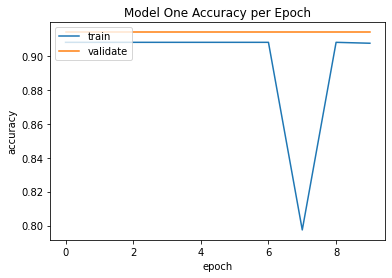

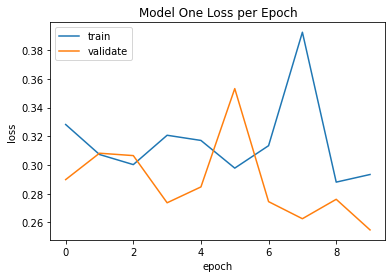

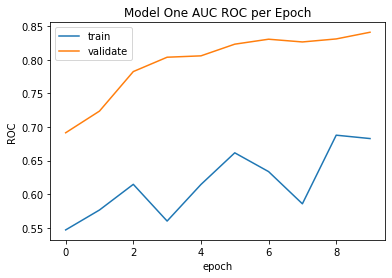

In [ ]:
# plot model accuracy per epoch 
plt.plot(history_model_one.history['accuracy'])
plt.plot(history_model_one.history['val_accuracy'])
plt.title('Model One Accuracy per Epoch')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

# plot model loss per epoch
plt.plot(history_model_one.history['loss'])
plt.plot(history_model_one.history['val_loss'])
plt.title('Model One Loss per Epoch')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

# plot model ROC per epoch
plt.plot(history_model_one.history['auc'])
plt.plot(history_model_one.history['val_auc'])
plt.title('Model One AUC ROC per Epoch')
plt.ylabel('ROC')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

In [ ]:
#create a dataframe to run the predictions
test_df = pd.DataFrame({'id':test_data['id']})
test_df.head()

id
0  /content/drive/MyDrive/Masters_stuff/BreaKHis_...
1  /content/drive/MyDrive/Masters_stuff/BreaKHis_...
2  /content/drive/MyDrive/Masters_stuff/BreaKHis_...
3  /content/drive/MyDrive/Masters_stuff/BreaKHis_...
4  /content/drive/MyDrive/Masters_stuff/BreaKHis_...

In [ ]:
# prepare test data (in same way as train data)
datagen_test = ImageDataGenerator(rescale=1./255.)

test_generator = datagen_test.flow_from_dataframe(
    dataframe=test_df,
    x_col='id', 
    y_col=None,
    target_size=(64,64),          
    batch_size=1,
    shuffle=False,
    class_mode=None)

Found 545 validated image filenames.


In [ ]:
#run model to find predictions

# predictions = model_one.predict(test_generator, verbose=1)
predictions_one = model_one.predict(test_generator, verbose=1)

545/545 [==============================] - 9s 17ms/step


In [ ]:
#create result dataframe
predictions_one = np.transpose(predictions_one)[0]
result1_df = pd.DataFrame()
result1_df['id'] = test_df['id']
result1_df['label'] = list(map(lambda x: 0 if x < 0.5 else 1, predictions_one))
result1_df.head()

id  label
0  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
1  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
2  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
3  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
4  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1

In [ ]:
#view test prediction counts
result1_df['label'].value_counts()

1    545
Name: label, dtype: int64

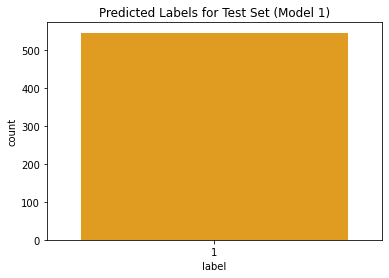

In [ ]:
#plot test predictions
sns.countplot(data=result1_df, x='label', color='orange').set(title='Predicted Labels for Test Set (Model 1)');

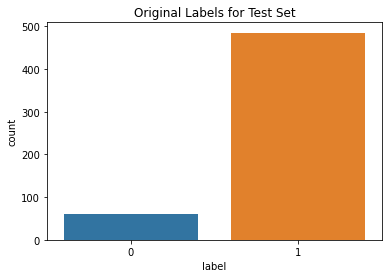

In [ ]:
#plot original values
sns.countplot(data=test_data, x='label').set(title='Original Labels for Test Set');

**Start second model building and training**

In [ ]:
# build second model like first but with hyperparameters and optimizer(s)
ROC_2 = tf.keras.metrics.AUC()

with strategy.scope():
    
    #create model
    model_two = Sequential()
    
    model_two.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', ))
    model_two.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
    model_two.add(MaxPooling2D(pool_size=(2,2)))
    model_two.add(Dropout(0.1))
    
    model_two.add(BatchNormalization())
    model_two.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    model_two.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    model_two.add(AveragePooling2D(pool_size=(2,2)))
    model_two.add(Dropout(0.1))
    
    model_two.add(BatchNormalization())
    model_two.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
    model_two.add(Flatten())
    model_two.add(Dense(1, activation='sigmoid'))
    
    #build model by input size
    model_two.build(input_shape=(BATCH_SIZE, 64, 64, 3))       # original image = (96, 96, 3) 
    
    #compile
    adam_optimizer = Adam(learning_rate=0.0001)
    model_two.compile(loss='binary_crossentropy', metrics=['accuracy', ROC_2], optimizer=adam_optimizer)

#quick look at model
model_two.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (256, 62, 62, 16)         448       
                                                                 
 conv2d_5 (Conv2D)           (256, 60, 60, 16)         2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (256, 30, 30, 16)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (256, 30, 30, 16)         0         
                                                                 
 batch_normalization (BatchN  (256, 30, 30, 16)        64        
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (256, 28, 28, 32)        

In [ ]:
EPOCHS = 10

# train second model
history_model_two = model_two.fit(
                        train_generator,
                        epochs = EPOCHS,
                        validation_data = valid_generator)

Epoch 1/10
8/8 [==============================] - 39s 5s/step - loss: 0.5642 - accuracy: 0.7293 - auc_1: 0.4161 - val_loss: 0.6457 - val_accuracy: 0.9141 - val_auc_1: 0.6323
Epoch 2/10
8/8 [==============================] - 35s 4s/step - loss: 0.3683 - accuracy: 0.8947 - auc_1: 0.4828 - val_loss: 0.6167 - val_accuracy: 0.9141 - val_auc_1: 0.6185
Epoch 3/10
8/8 [==============================] - 36s 4s/step - loss: 0.3191 - accuracy: 0.9082 - auc_1: 0.5650 - val_loss: 0.5992 - val_accuracy: 0.9141 - val_auc_1: 0.6290
Epoch 4/10
8/8 [==============================] - 35s 4s/step - loss: 0.3150 - accuracy: 0.9082 - auc_1: 0.5828 - val_loss: 0.5927 - val_accuracy: 0.9141 - val_auc_1: 0.6447
Epoch 5/10
8/8 [==============================] - 34s 4s/step - loss: 0.3086 - accuracy: 0.9076 - auc_1: 0.6094 - val_loss: 0.5943 - val_accuracy: 0.9141 - val_auc_1: 0.6642
Epoch 6/10
8/8 [==============================] - 36s 4s/step - loss: 0.2920 - accuracy: 0.9082 - auc_1: 0.6707 - val_loss: 0.5992

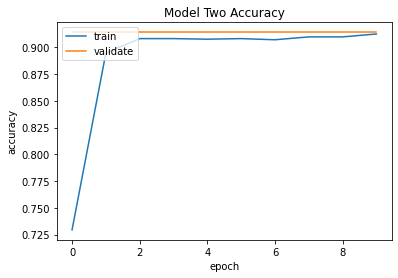

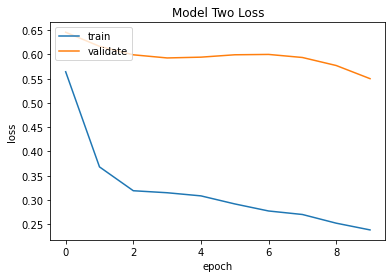

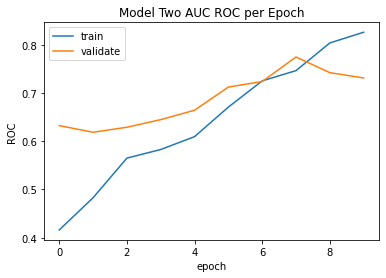

In [ ]:
# graph loss
plt.plot(history_model_two.history['accuracy'])
plt.plot(history_model_two.history['val_accuracy'])
plt.title('Model Two Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

plt.plot(history_model_two.history['loss'])
plt.plot(history_model_two.history['val_loss'])
plt.title('Model Two Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

# plot model ROC per epoch
plt.plot(history_model_two.history['auc_1'])
plt.plot(history_model_two.history['val_auc_1'])
plt.title('Model Two AUC ROC per Epoch')
plt.ylabel('ROC')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

In [ ]:
#run model to find predictions

# predictions = model_one.predict(test_generator, verbose=1)
predictions_two = model_two.predict(test_generator, verbose=1)

545/545 [==============================] - 10s 17ms/step


In [ ]:
#create result dataframe
predictions_two = np.transpose(predictions_two)[0]
result2_df = pd.DataFrame()
result2_df['id'] = test_df['id']
result2_df['label'] = list(map(lambda x: 0 if x < 0.5 else 1, predictions_two))
result2_df.head()

id  label
0  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
1  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
2  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
3  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
4  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1

In [ ]:
#view test prediction counts
result2_df['label'].value_counts()

1    545
Name: label, dtype: int64

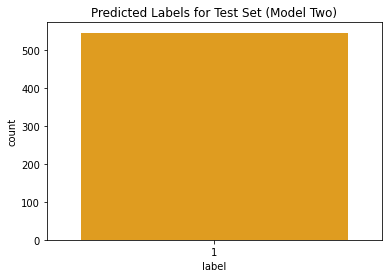

In [ ]:
#plot test predictions
sns.countplot(data=result2_df, x='label', color='orange').set(title='Predicted Labels for Test Set (Model Two)');

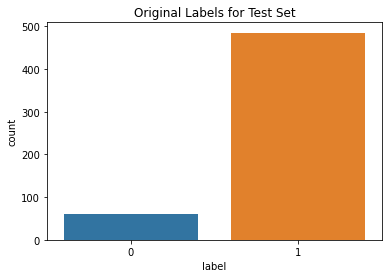

In [ ]:
#plot original values
sns.countplot(data=test_data, x='label').set(title='Original Labels for Test Set');

**Start third model building and training**



In [ ]:
# set ROC AUC as metric
ROC_3 = tf.keras.metrics.AUC()

# use GPU
with strategy.scope():
    
    #create model
    model_three = Sequential()
    
    model_three.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))
    model_three.add(MaxPooling2D(pool_size=(2,2)))

    model_three.add(Flatten())
    model_three.add(Dense(1, activation='softmax'))
    
    #build model by input size
    model_three.build(input_shape=(BATCH_SIZE, 64, 64, 3))        
    
    #compile
    model_three.compile(loss='binary_crossentropy', metrics=['accuracy', ROC_3])
    
#quick look at model
model_three.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (256, 62, 62, 16)         448       
                                                                 
 max_pooling2d_3 (MaxPooling  (256, 31, 31, 16)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (256, 15376)              0         
                                                                 
 dense_3 (Dense)             (256, 1)                  15377     
                                                                 
Total params: 15,825
Trainable params: 15,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 10

# train second model
history_model_three = model_three.fit(
                        train_generator,
                        epochs = EPOCHS,
                        validation_data = valid_generator)

Epoch 1/10
8/8 [==============================] - 34s 5s/step - loss: 0.3616 - accuracy: 0.9082 - auc_3: 0.5000 - val_loss: 0.2849 - val_accuracy: 0.9141 - val_auc_3: 0.5000
Epoch 2/10
8/8 [==============================] - 30s 4s/step - loss: 0.2951 - accuracy: 0.9082 - auc_3: 0.5000 - val_loss: 0.2867 - val_accuracy: 0.9141 - val_auc_3: 0.5000
Epoch 3/10
8/8 [==============================] - 31s 4s/step - loss: 0.2983 - accuracy: 0.9082 - auc_3: 0.5000 - val_loss: 0.2411 - val_accuracy: 0.9141 - val_auc_3: 0.5000
Epoch 4/10
8/8 [==============================] - 29s 4s/step - loss: 0.2629 - accuracy: 0.9082 - auc_3: 0.5000 - val_loss: 0.2280 - val_accuracy: 0.9141 - val_auc_3: 0.5000
Epoch 5/10
8/8 [==============================] - 32s 4s/step - loss: 0.2615 - accuracy: 0.9082 - auc_3: 0.5000 - val_loss: 0.2286 - val_accuracy: 0.9141 - val_auc_3: 0.5000
Epoch 6/10
8/8 [==============================] - 30s 4s/step - loss: 0.2455 - accuracy: 0.9082 - auc_3: 0.5000 - val_loss: 0.2149

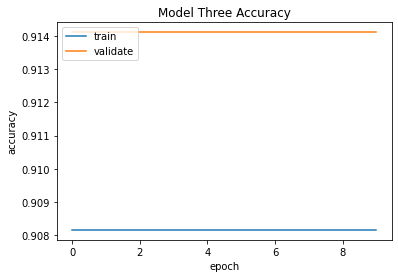

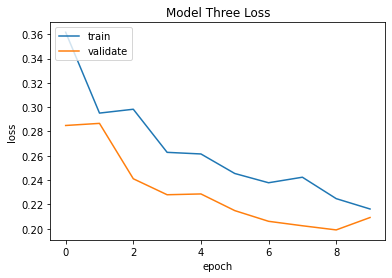

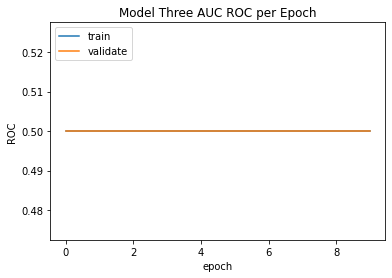

In [ ]:
# graph loss
plt.plot(history_model_three.history['accuracy'])
plt.plot(history_model_three.history['val_accuracy'])
plt.title('Model Three Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

plt.plot(history_model_three.history['loss'])
plt.plot(history_model_three.history['val_loss'])
plt.title('Model Three Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

# plot model ROC per epoch
plt.plot(history_model_three.history['auc_3'])
plt.plot(history_model_three.history['val_auc_3'])
plt.title('Model Three AUC ROC per Epoch')
plt.ylabel('ROC')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show();

In [ ]:
#run model to find predictions

# predictions = model_one.predict(test_generator, verbose=1)
predictions_three = model_three.predict(test_generator, verbose=1)

545/545 [==============================] - 12s 22ms/step


In [ ]:
#create result dataframe
predictions_three = np.transpose(predictions_three)[0]
result3_df = pd.DataFrame()
result3_df['id'] = test_df['id']
result3_df['label'] = list(map(lambda x: 0 if x < 0.5 else 1, predictions_three))
result3_df.head()

id  label
0  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
1  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
2  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
3  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1
4  /content/drive/MyDrive/Masters_stuff/BreaKHis_...      1

In [ ]:
#view test prediction counts
result3_df['label'].value_counts()

1    545
Name: label, dtype: int64

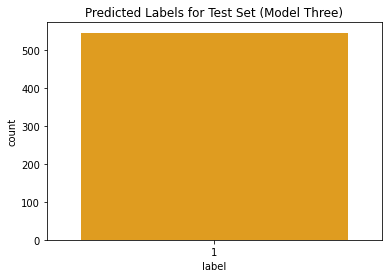

In [ ]:
#plot test predictions
sns.countplot(data=result3_df, x='label', color='orange').set(title='Predicted Labels for Test Set (Model Three)');

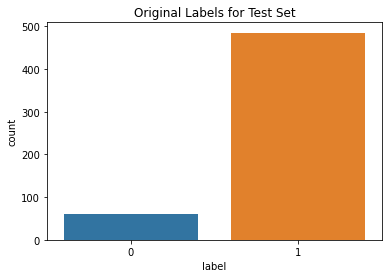

In [ ]:
#plot original values
sns.countplot(data=test_data, x='label').set(title='Original Labels for Test Set');

**Plotting accuracy of the above models**

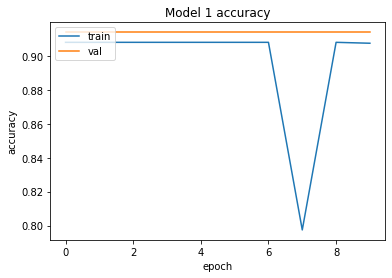

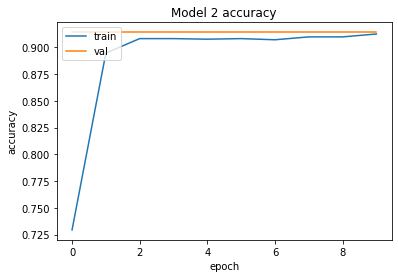

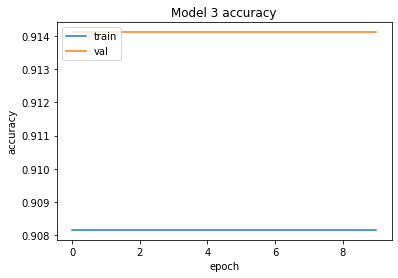

In [ ]:
plt.plot(history_model_one.history['accuracy'])
plt.plot(history_model_one.history['val_accuracy'])
plt.title('Model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_model_two.history['accuracy'])
plt.plot(history_model_two.history['val_accuracy'])
plt.title('Model 2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_model_three.history['accuracy'])
plt.plot(history_model_three.history['val_accuracy'])
plt.title('Model 3 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()